# Определение болезни Альцгеймера на основе 2d-снимков МРТ головного мозга с использованием сверточных нейронных сетей.

Используемый датасет: https://www.kaggle.com/datasets/katalniraj/adni-extracted-axial

# 1. Постановка задачи

Использование нейронных сетей в медицине становится все более распространненым методом, который помогает врачам в определении болезней, назначении правильного лечения на основе предыдущих случаев, ускореннии принятия решения и т.д.. Болезнь Альцгеймера является одним из наиболее распространенных нейродегенеративных заболеваний в наши дни.

Определение болезни Альцгеймера важно для медицины и общества по нескольким причинам:

1. Ранняя диагностика и лечение: болезнь Альцгеймера является прогрессирующим неврологическим заболеванием, которое приводит к потере памяти, когнитивным нарушениям и изменениям личности. Раннее обнаружение болезни позволяет начать лечение и медицинское вмешательство на ранних стадиях, когда они могут быть более эффективными.

2. Управление заболеванием и уход за пациентами: точное определение болезни Альцгеймера позволяет проводить более эффективное управление болезнью, а также планирование и оказание качественного ухода для пациентов. Знание о наличии болезни помогает врачам и семьям адаптировать окружающую среду, предоставлять социальную и эмоциональную поддержку, а также принимать соответствующие меры для обеспечения безопасности пациентов.

3. Исследования и развитие новых методов лечения: определение болезни Альцгеймера является важным для научных исследований и развития новых методов лечения. Чем больше мы знаем о ранних стадиях болезни и ее механизмах, тем больше возможностей у нас есть для разработки новых лекарственных препаратов и терапевтических подходов. Точная диагностика также позволяет наблюдать прогрессию болезни и эффективность лечения, внося вклад в дальнейшие исследования и повышение качества здравоохранения.

4. Планирование общественного здравоохранения и социальных услуг: определение болезни Альцгеймера имеет важное значение для планирования общественного здравоохранения и социальных услуг. С учетом растущей популяции пожилых людей и увеличения числа случаев болезни Альцгеймера, ранняя диагностика и обеспечение соответствующих услуг и поддержки становятся все более важными.

Цель данного проекта - разработать модель глубокого обучения, использующую сверточные нейронные сети для определения болезни Альцгеймера на основе 2D-снимков МРТ головного мозга.

Для достижения этой цели следует определить конкретные задачи:

1. Сбор и предобработка данных: при первоначальном этапе проекта требуется собрать набор данных, состоящий из 2D-снимков МРТ, представляющих головной мозг пациентов с известным диагнозом Альцгеймера и без этого диагноза. Затем данные необходимо предобработать, что включает в себя шумоподавление, нормализацию и т.д..

2. Архитектура сверточной нейронной сети: для анализа 2D-снимков МРТ головного мозга необходимо разработать архитектуру сверточной нейронной сети. Возможно применение предобученной модели resnet18 для сравнительного анализа эффективности собственной модели и готовой.

3. Обучение модели: после определения архитектуры сверточной нейронной сети следует обучить модель на собранном наборе данных.

4. Оценка и тестирование модели: после обучения модель должна быть оценена и протестирована на тестовом наборе данных с использованием метрики accuracy, матрицы неточностей, а также ckassification report.

5. Итоги исследования: на основе полученных результатов дать оценку полученным моделям и приянть решение о их применении в медицине, а также сравнение результатов с другими моделями.




#2. Анализ данных

В данной области существует различные виды датасетов и исследований. На используемом датасете представлена одна из работ (https://www.kaggle.com/code/pradiptomondal/notebook0c82f8bd22), в которой представлены результаты классификации изображений с использованием resnet50. Модель использовалась в качестве Fine Tuning и в результате на тестовом наборе наблюдается accuracy равная 0.9961. Таким образом, предобученные модели показывают хорошее качество, а значит их применение для решение данной задачи вполне уместно.

На похожем датасете (используется не 3 класса, а 5) также применяется предобученная модель (https://www.kaggle.com/code/sadikaljarif/alzheimers-disease-classification-efficientnetb6). В работе используется EfficientNetB6 с весами полученными при обучении на ImageNet. Результаты классификации на данном датасете при использовании тестового набора не очень хорошие - только 53% точности. Однако стоит учесть несколько факторов при анализе данного исследования:
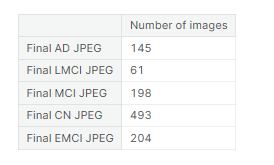
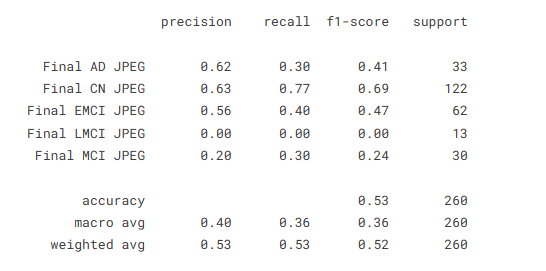

1. Изображений для некоторых классов очень мало. Например, LMCI имеет только 61 изображение в тренировочном датасете и 13 в тестовом, чего явно не хвататет для качественной классификации. Здесь будет уместна не сильная аугментация для расширения датасета.

2. Модель переобучилась. На тренировочном датасете точность достигает 99%, в то время как на тесте 53%. Возможно стоит выбрать более простую модель для данного набора и проверить предположение о переобучении.


Таким образом, для данной задачи рапсространено использование предоубученных моделей, но нужно анализировать ситуацию и примнимать решение о применимости той или иной готовой модели.

Описание датасета: ADNI предоставляет данные о болезни Альцгеймера в формате Nifti или DICOM, который представляет собой объемные 3D-данные. Работа непосредственно с 3D-данными становится немного затруднительной, поэтому данный набор данных был создан для легкой реализации алгоритмов обработки изображений. Этот набор данных состоит из 2D-осевых изображений, извлеченных из базового набора данных ADNI, который состоял из изображений Nifti. Он состоит из 3 классов: AD (болезнь Альцгеймера), CI (легкие когнитивные нарушения) и CN (общая норма).

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "kortana"
os.environ['KAGGLE_KEY'] = "a343264181f7e41c1b4ac43285fc2840"
!kaggle datasets download -d katalniraj/adni-extracted-axial

 97% 99.0M/102M [00:05<00:00, 22.8MB/s]
100% 102M/102M [00:06<00:00, 17.7MB/s] 


In [ ]:
from zipfile import ZipFile

with ZipFile("adni-extracted-axial.zip", "r") as myzip:
    myzip.extractall()

In [ ]:
from torchvision.datasets import ImageFolder
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision.transforms import v2
import torchvision as tv

/usr/local/lib/python3.10/dist-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https:/

In [ ]:
transform = transforms.Compose([
    transforms.Resize(size=(200, 200)),
    transforms.ToTensor(),
])
dataset = ImageFolder('Axial', transform=transform)

In [ ]:
classes, num = np.unique(dataset.targets, return_counts = True)
print('Сбалансированность классов:', dict(zip(classes, num)))

Сбалансированность классов: {0: 1124, 1: 2590, 2: 1440}


Классы практически сбалансированы, увелечение размера датасета с помощью аугментации не требуется. Расшифровка классов:
1. класс 0 - класс AD - болезнь Альцгеймера
2. класс 1 - класс CI - легкие когнетивные нарушения
3. класс 2 - класс CN - общая норма

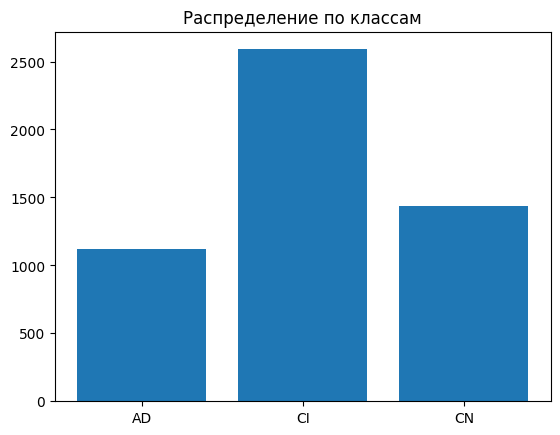

In [ ]:
labels = ['AD','CI','CN']
plt.bar(labels, num)
plt.title('Распределение по классам')
plt.show()

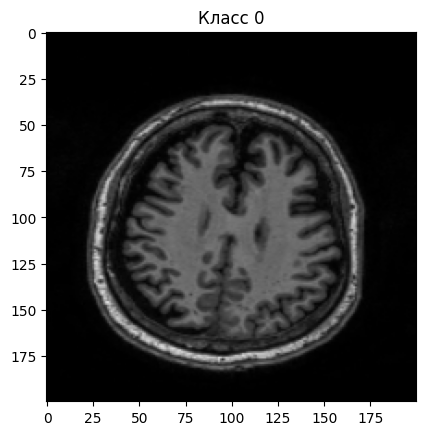

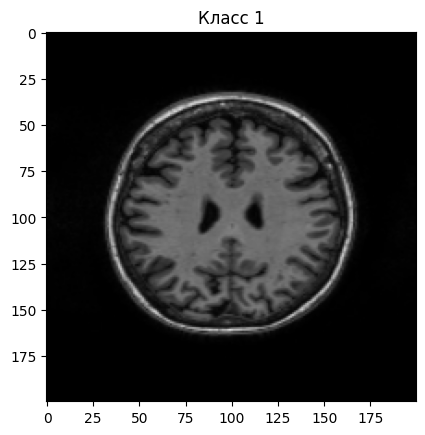

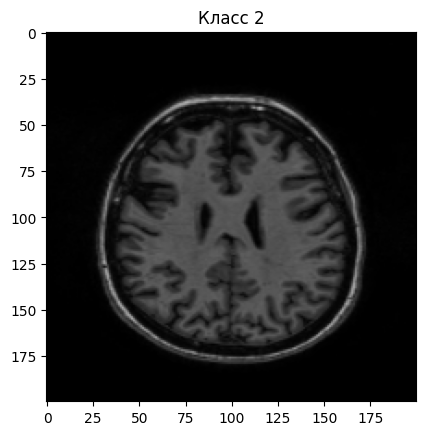

In [ ]:
dataiter = iter(dataset)
label_traget = 0
for i in range(5000):
    img, label = next(dataiter)
    if label==label_traget:
      plt.imshow(img.permute(1, 2, 0))
      plt.title('Класс '+str(label))
      plt.show()
      label_traget+=1

In [ ]:
print('Характеристики входного изображения:',img.shape)

Характеристики входного изображения: torch.Size([3, 200, 200])


Входное изображение трехканальное размер 200 на 200 пикселей. Такой формат подойдет для использования изображения в предобученных сетях, преобразования с размерностью не требуются.

# 3. Методика реализации

Проведем два эксперимента: построим  модель вручную, используя сверточные слои, махпулинг и полносвязные слои, а затем применим предобученную модель ResNet18 для сравнения и оценим более подходящую модель для данной задачи на тестовом наборе данных. Для реализации будем использовать библиотеку PyTorch.

In [ ]:
data_train, data_test = torch.utils.data.random_split(dataset, [0.8, 0.2], generator=torch.Generator().manual_seed(42))

In [ ]:
print('Количество наблюдений в обучающей выборке',len(data_train))
print('Количество наблюдений в тестовой выборке',len(data_test))

Количество наблюдений в обучающей выборке 4124
Количество наблюдений в тестовой выборке 1030


In [ ]:
train_loader = DataLoader(data_train, batch_size = 20, shuffle = True)
test_loader = DataLoader(data_test, batch_size = 20, shuffle = False)

In [ ]:
def train(model, epoch):
    train_losses = []
    test_losses = []

    for i in range(epoch):
        model.train()
        losses_epoch_train = []
        losses_epoch_test = []
        y_pred_test = []
        y_true_test = []
        for x_example, y_example in train_loader:
            x_example = x_example.to(device)
            y_example = y_example.to(device)
            y_pred = model(x_example)

            loss = criterion(y_pred, y_example)
            losses_epoch_train.append(loss.cpu().detach().item())
            loss.backward()

            optimizer.step()
            optimizer.zero_grad()

        for x_example, y_example in test_loader:
            x_example = x_example.to(device)
            y_example = y_example.to(device)
            y_pred = model(x_example)

            loss = criterion(y_pred, y_example)
            losses_epoch_test.append(loss.cpu().detach().item())

            y_pred_test.extend(y_pred.cpu().detach())
            y_true_test.extend(list(y_example.cpu().detach()))

        train_losses.append(np.mean(losses_epoch_train))
        test_losses.append(np.mean(losses_epoch_test))
        y_pred_test = list(map(lambda x: torch.argmax(x).item(), y_pred_test))
        y_true_test = list(map(lambda x: x.item(), torch.stack(y_true_test).reshape(-1,1)))
        print(f'epoch {i}: train_loss = {np.mean(losses_epoch_train):.8f}, test_loss = {np.mean(losses_epoch_test):.8f}')
        print('Точность на тестовой выборке:', accuracy_score(y_true_test, y_pred_test))
    return model, train_losses, test_losses, y_true_test, y_pred_test

In [ ]:
#посмотреть на каких примерах ошибаемся
def look_wrong(model):
    k = 0
    for x_example, y_example in test_loader:
        x_example = x_example.to(device)
        y_example = y_example.to(device)
        y_pred = model(x_example)
        y_pred = list(map(lambda x: torch.argmax(x).item(), y_pred.cpu()))
        y_true = y_example.cpu().numpy()
        for i in range(len(y_pred)):
            if y_true[i]!=y_pred[i]:
                plt.imshow(x_example[i].cpu().permute(1, 2, 0))
                plt.title('Реальный класс: '+str(y_true[i])+'. Предсказанный:'+str(y_pred[i]))
                plt.show()
                k+=1
                if k==3:
                    break
        if k==3:
            break

## Собственная сеть

In [ ]:
n_features = 3
n_neurons_1 = 32
n_neurons_2 = 64
n_neurons_3 = 128
n_neurons_4 = 512
n_outputs = 3
losses = []

class Model(nn.Module):
  def __init__(self, n_features, n_neurons_1, n_neurons_2, n_neurons_3, n_neurons_4, n_outputs):
    super().__init__()
    self.fc1 = nn.Conv2d(n_features, n_neurons_1, kernel_size = 3)
    self.fc2 = nn.Conv2d(n_neurons_1, n_neurons_2, kernel_size = 3)
    self.fc3 = nn.Conv2d(n_neurons_2, n_neurons_3, kernel_size = 3)
    self.fc4 = nn.Linear(67712, n_neurons_4)
    self.fc5 = nn.Linear(n_neurons_4, n_outputs)
    self.dropout = nn.Dropout(0.25)

  def forward(self, X):
    X = nn.ReLU()(self.fc1(X))
    X = F.max_pool2d(X, 2)
    X = nn.ReLU()(self.fc2(X))
    X = F.max_pool2d(X, 2)
    X = self.dropout(X)
    X = nn.ReLU()(self.fc3(X))
    X = F.max_pool2d(X, 2)
    X = torch.flatten(X, 1)
    X = self.dropout(X)
    X = nn.Softplus()(self.fc4(X))
    y_pred = self.fc5(X)
    return y_pred

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
model_own = Model(n_features, n_neurons_1, n_neurons_2, n_neurons_3, n_neurons_4, n_outputs)
model_own = model_own.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_own.parameters(), lr=0.0001)

In [ ]:
%%time
model_own, train_losses, test_losses, y_true_test, y_pred_test = train(model_own, 10)

epoch 0: train_loss = 0.92562045, test_loss = 0.71729745
Точность на тестовой выборке: 0.7077669902912621
epoch 1: train_loss = 0.57775793, test_loss = 0.37544670
Точность на тестовой выборке: 0.8524271844660194
epoch 2: train_loss = 0.29165076, test_loss = 0.30243442
Точность на тестовой выборке: 0.8815533980582524
epoch 3: train_loss = 0.18216084, test_loss = 0.14333526
Точность на тестовой выборке: 0.9504854368932039
epoch 4: train_loss = 0.10035356, test_loss = 0.10991144
Точность на тестовой выборке: 0.954368932038835
epoch 5: train_loss = 0.07270212, test_loss = 0.06556340
Точность на тестовой выборке: 0.9786407766990292
epoch 6: train_loss = 0.05822969, test_loss = 0.16041342
Точность на тестовой выборке: 0.9398058252427185
epoch 7: train_loss = 0.04397586, test_loss = 0.09953383
Точность на тестовой выборке: 0.9631067961165048
epoch 8: train_loss = 0.03417815, test_loss = 0.04097305
Точность на тестовой выборке: 0.983495145631068
epoch 9: train_loss = 0.02389378, test_loss = 0.

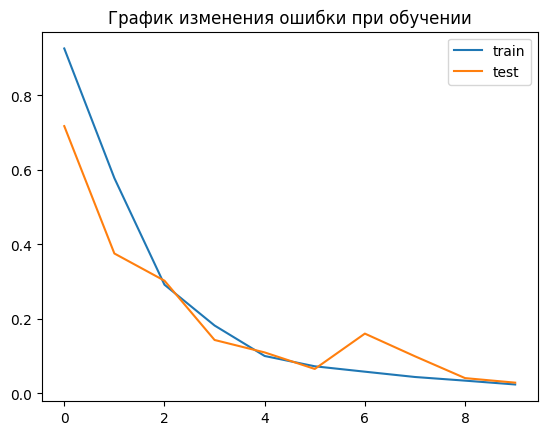

In [ ]:
plt.plot(train_losses, label = 'train')
plt.plot(test_losses, label = 'test')
plt.legend()
plt.title('График изменения ошибки при обучении')
plt.show()

In [ ]:
model_own

Model(
  (fc1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc4): Linear(in_features=67712, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=3, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

# ResNet18

In [ ]:
from torchvision.models import resnet18, ResNet18_Weights
model_resnet = nn.Sequential()

model_resnet.add_module('resnet', resnet18(weights  = ResNet18_Weights.DEFAULT))

model_resnet.add_module('relu_1', nn.ReLU())
model_resnet.add_module('fc_1', nn.Linear(1000, 512))
model_resnet.add_module('relu_2', nn.ReLU())
model_resnet.add_module('fc_2', nn.Linear(512, 3))

In [ ]:
model_resnet = model_resnet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_resnet.parameters(), lr=0.00001)

In [ ]:
%%time
model_resnet, train_losses, test_losses, y_true_test, y_pred_test = train(model_resnet, 5)

epoch 0: train_loss = 0.75005890, test_loss = 0.43204902
Точность на тестовой выборке: 0.8660194174757282
epoch 1: train_loss = 0.19479272, test_loss = 0.10567864
Точность на тестовой выборке: 0.9805825242718447
epoch 2: train_loss = 0.03364774, test_loss = 0.04846892
Точность на тестовой выборке: 0.9883495145631068
epoch 3: train_loss = 0.01478459, test_loss = 0.03139233
Точность на тестовой выборке: 0.9902912621359223
epoch 4: train_loss = 0.00815278, test_loss = 0.02265299
Точность на тестовой выборке: 0.9922330097087378
CPU times: user 1min 26s, sys: 979 ms, total: 1min 27s
Wall time: 1min 28s


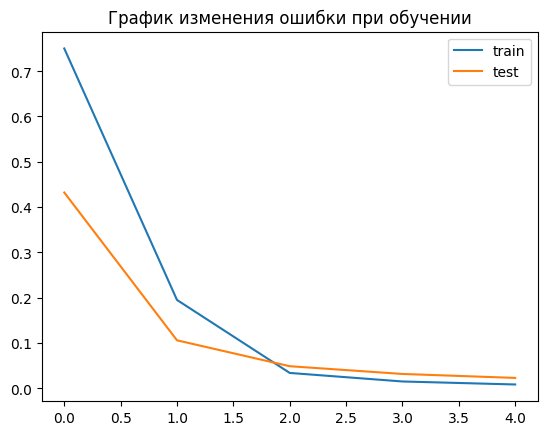

In [ ]:
plt.plot(train_losses, label = 'train')
plt.plot(test_losses, label = 'test')
plt.legend()
plt.title('График изменения ошибки при обучении')
plt.show()

# Итоги обучения модели

Из двуз моделей была выбрана модель со слоями ResNet, поскольку при обучении она оказалась более стабильной и показала лучшее качество в сравнении с собственной моделью. Также её точность соотносится с качеством модели на основе ResNet50, которая была построена в одном из исследовании.

In [ ]:
print('Точность на тестовой выборке:', accuracy_score(y_true_test, y_pred_test))

Точность на тестовой выборке: 0.9922330097087378


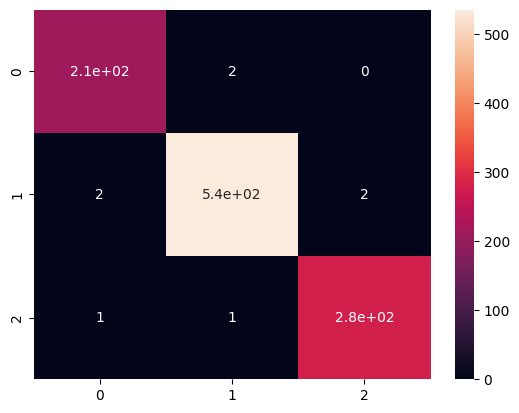

In [ ]:
cf_matrix = confusion_matrix(y_true_test, y_pred_test)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

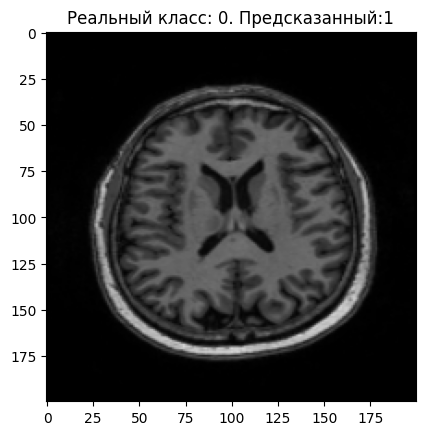

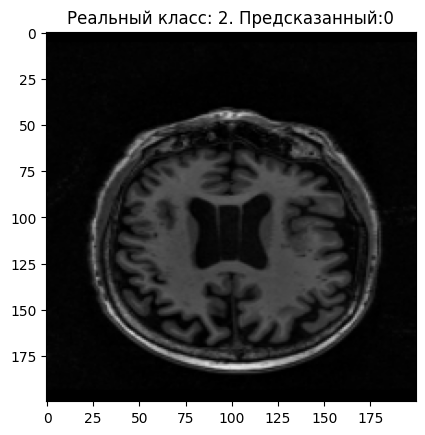

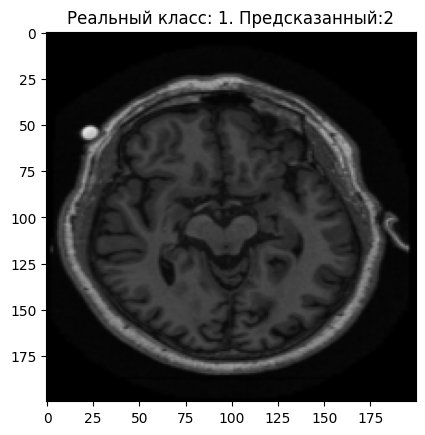

In [ ]:
look_wrong(model_resnet)

In [ ]:
print(classification_report(y_true_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       213
           1       0.99      0.99      0.99       539
           2       0.99      0.99      0.99       278

    accuracy                           0.99      1030
   macro avg       0.99      0.99      0.99      1030
weighted avg       0.99      0.99      0.99      1030



# Выводы

В результате данного исследования была построена модель глубокого обучения на основе сверточных нейронных сетей, которая позволила классифицировать МРТ снимки пациентов на определение болезни Альцгеймера.

На основе данной раюоты можно выделить, что предобученные сети являются очень эффективным инструментом. При этом в сранвении с собственными моделями предобученные сети позволяют сократить время обучения и получить более качественные прогнозы.

С использование сети ResNet18 удалось достичь точности в 99% на тестовой выборке, что также подвтерждается матрицей неточностей и отчетом с метриками. Модель ошибается крайне редко и умеют разделять и классфицировать все три рассматриваемых класса.

В дальнейшем данную модель можно расширить на большее количество классов для определения нескольких этапов болезни, что позволит проводить лечение в соотвествии с текущей ситуацией более качественно.